In [1]:
import numpy as np # linear algebra
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt # to show images
from PIL import Image # to read images
import os
import glob

In [2]:
root_images= "images_chem4/"
root_annots= "annot_chem4/"

In [3]:
all_images = os.listdir("images_chem4/")
print(f"Total images : {len(all_images)}")

annota = glob.glob('annot_chem4/')
annotation=[]
for b in annota:
    annotation+=glob.glob(b+"/*")
print(f"Total annotation : {len(annotation)}")
print(len(annota))

Total images : 601
Total annotation : 601
1


In [4]:
import cv2

img_dir = "images_chem4/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

In [5]:
all_images[0]

'akhand_b43_0.jpg'

In [6]:
im=Image.open('images_chem4/akhand_b43_18.jpg')

In [7]:
k=os.path.join(root_images,all_images[0])
print(k)

images_chem4/akhand_b43_0.jpg


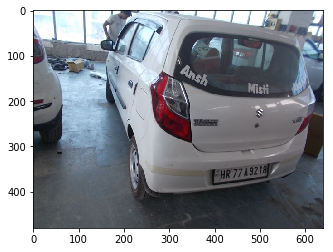

In [8]:
plt.imshow(im)

In [9]:
def bounding_box(image):
    bpath=root_annots+str([image.split("_")[0]])+"/"+str(image.split(".")[0])
    tree = ET.parse(bpath)
    root = tree.getroot()
    objects = root.findall('object')
    for o in objects:
        bndbox = o.find('bndbox') # reading bound box
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
    return (xmin,ymin,xmax,ymax)

In [10]:
from xml.dom import minidom

def read_points_from_xml(xmlFileName):
    
#Reads control points for face alignment.

    xmldoc = minidom.parse(xmlFileName)
    objectlist = xmldoc.getElementsByTagName('object')
    faces = {}
    for xmlFace in objectlist:        
        fileName = xmlFace.attributes['bndbox'].value
        xmin = int(xmlFace.attributes['xmin'].value)
        ymin = int(xmlFace.attributes['ymin'].value)
        xmax = int(xmlFace.attributes['xmax'].value)
        ymax = int(xmlFace.attributes['ymax'].value)
        faces[fileName] = array([xmin, ymin, xmax, ymax])
    return faces

In [11]:
xml='annot_chem4/akhand_b43_0.xml'

In [12]:
read_points_from_xml(xml)

KeyError: 'bndbox'

In [ ]:
plt.figure(figsize=(10,10))
for i,image in enumerate(all_images):
    bbox=bounding_box(image)
    im=Image.open(os.path.join(root_images,image))
    im=im.crop(bbox)
    
    plt.subplot(3,3,i+1)
    plt.axis("off")
    plt.imshow(im)    
    if(i==8):
        break